In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

list_df = pd.read_csv('listings.csv.gz', compression='gzip')
review_df = pd.read_csv('reviews.csv.gz', compression='gzip')
cal_df = pd.read_csv('calendar.csv.gz', compression='gzip')

### Exploration 

Let's take a look at the first few rows and some info about each dataframe. 

In [3]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.91
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.90,4.67,4.66,STR-OPLI-19-003039,f,9,0,9,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.95,4.98,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.59
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.99,4.96,4.95,STR-OPLI-19-002182,f,2,2,0,0,0.52
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.66,4.91,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.63


In [4]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...


In [5]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-12-21,f,$90.00,NaN,30.0,1125.0
1,6606,2023-12-22,f,$90.00,NaN,30.0,1125.0
2,6606,2023-12-23,t,$90.00,NaN,30.0,1125.0
3,6606,2023-12-24,t,$90.00,NaN,30.0,1125.0
4,6606,2023-12-25,t,$90.00,NaN,30.0,1125.0


In [6]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468790 entries, 0 to 468789
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     468790 non-null  int64 
 1   id             468790 non-null  int64 
 2   date           468790 non-null  object
 3   reviewer_id    468790 non-null  int64 
 4   reviewer_name  468790 non-null  object
 5   comments       468730 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.5+ MB


In [9]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512306 entries, 0 to 2512305
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 134.2+ MB


Price is the output we're most interested in, so let's make sure prices are an float. 

In [156]:
list_df['price'].value_counts(dropna=False)

NaN        378
$100.00    103
$80.00     102
$85.00      83
$99.00      83
          ... 
$799.00      1
$247.00      1
$513.00      1
$338.00      1
$476.00      1
Name: price, Length: 534, dtype: int64

Well... that's annoying. We're missing prices and the price is stored as a string because it contains the currency symbol. As a global company, it makes perfect sense for AirBNB to use the currency symbol, but every listing in Seattle should use USD as its currency. 

Let's get rid of those $ and any commas that might appear in large prices. 

In [46]:
list_df['price_float'] = list_df['price'].str.split("$").str[1]
list_df['price_float'] = list_df['price_float'].str.replace(",","")
list_df['price_float'] = list_df['price_float'].astype('float64')

I would like to graph the distribution of prices, but the fact that there are still NaNs will cause an issue. Getting those prices will also make any analysis stronger. We'll return to the issue of missing prices later on.

First, let's turn out attention to reviews. Let's look at the number of reviews. 

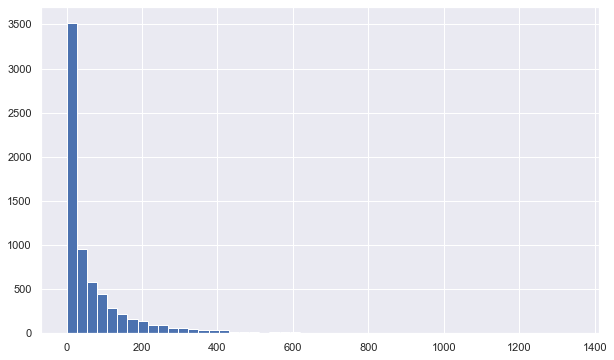

In [69]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 50);

It looks like many places have few reivews, but there are a few properties with lots of reviews that stretch this graph out. Let's zoom into the places with the fewest reviews. 

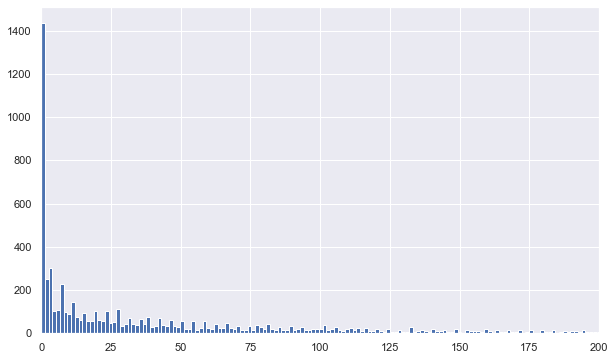

In [158]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 1000);
plt.xlim(0,200);

The first bucket is capturing places with 0 or 1 reviews, which accounts for most properties. Now let's look at those review scores. 

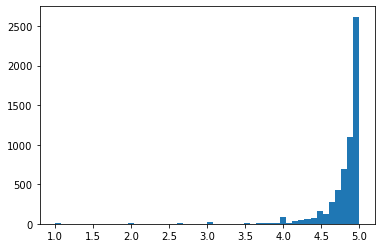

In [19]:
plt.hist(data=list_df, x = "review_scores_rating",bins = 50);


Most places have pretty high reviews! Let's try looking at some of the component review scores. 

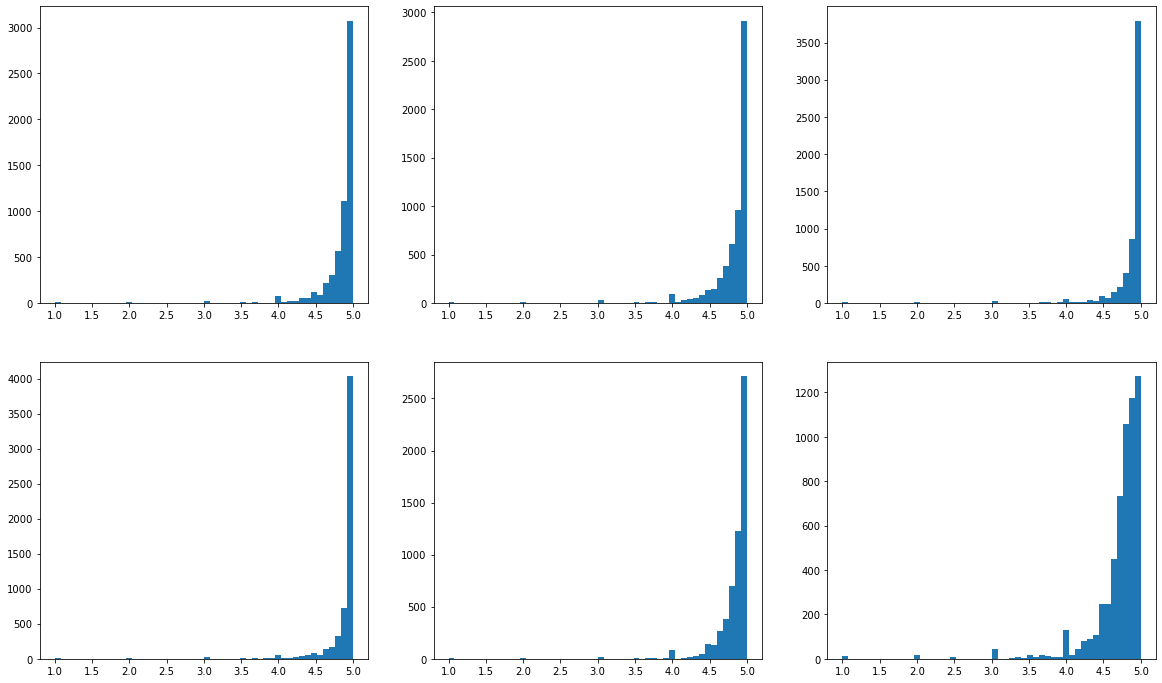

In [48]:
plt.figure(figsize = [20, 12]) 

plt.subplot(2, 3, 1) 
plt.hist(data=list_df, x='review_scores_accuracy', bins=50);


plt.subplot(2, 3, 2) 
plt.hist(data=df, x='review_scores_cleanliness', bins=50);


plt.subplot(2, 3, 3)  
plt.hist(data=df, x='review_scores_checkin', bins=50);


plt.subplot(2, 3, 4) 
plt.hist(data=df, x='review_scores_communication', bins=50);

plt.subplot(2, 3, 5)  
plt.hist(data=df, x='review_scores_location', bins=50);


plt.subplot(2, 3, 6) 
plt.hist(data=df, x='review_scores_value', bins=50);

People are almost always very happy with host communication, but the reviews for the value for their money varies the most. 

Now we can look at some info about neighborhoods. 

In [50]:
list_df['neighbourhood_cleansed'].value_counts()

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64

In [55]:
neighborhood_counts = list_df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64


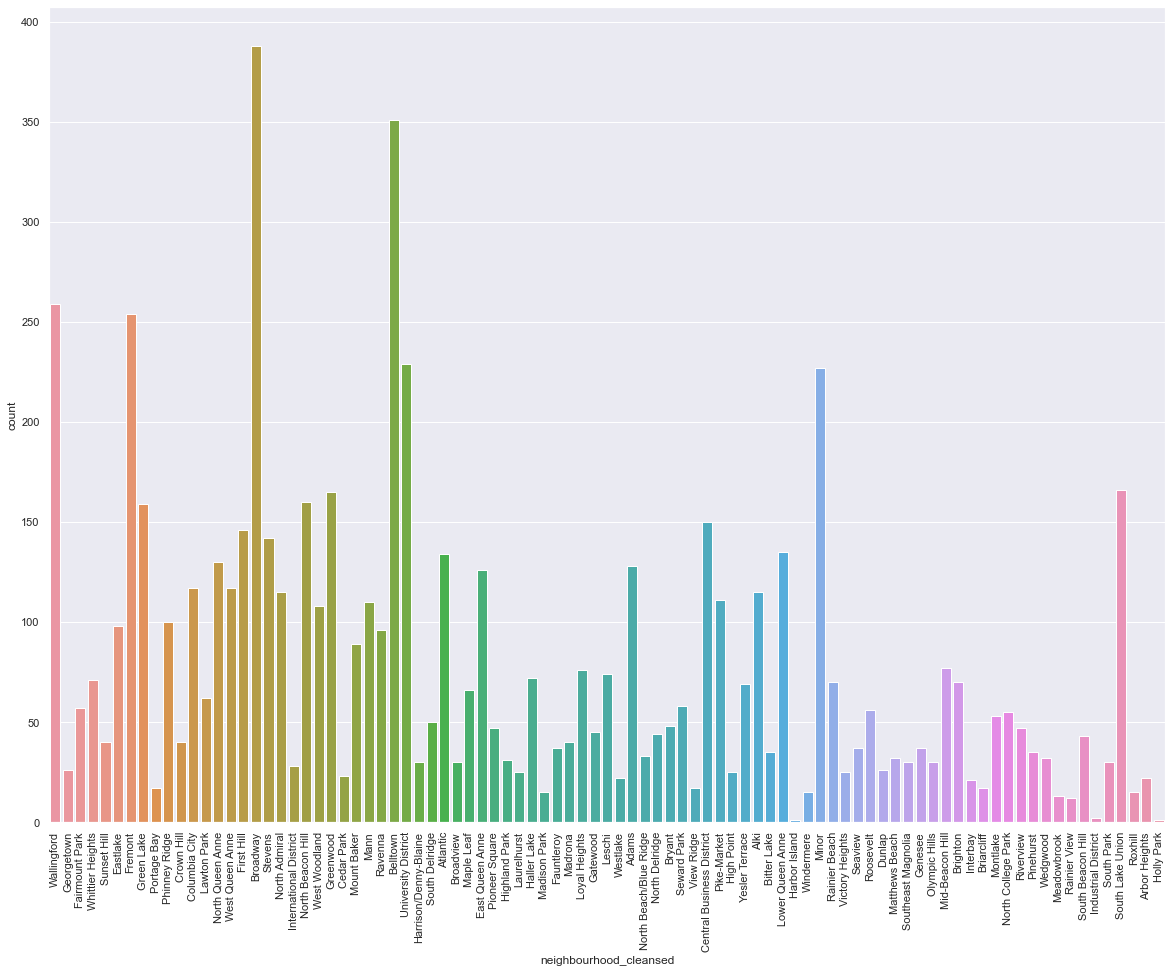

In [63]:
sns.countplot(data=list_df, x='neighbourhood_cleansed')
sns.set(rc={'figure.figsize':(25,20)})
plt.xticks(rotation = 90);

I'll take a look at prices by neighborhood. I'll make a quick function to do so. 

In [127]:
def grouped_means_graph(df, x_axis, y_axis, fig_size):
    grouped_df = df.groupby([x_axis])[y_axis].mean()
    grouped_df.plot.bar(figsize=(fig_size),title = f"{x_axis} vs mean of {y_axis}", xlabel = x_axis, ylabel = (f'Mean {y_axis}'))

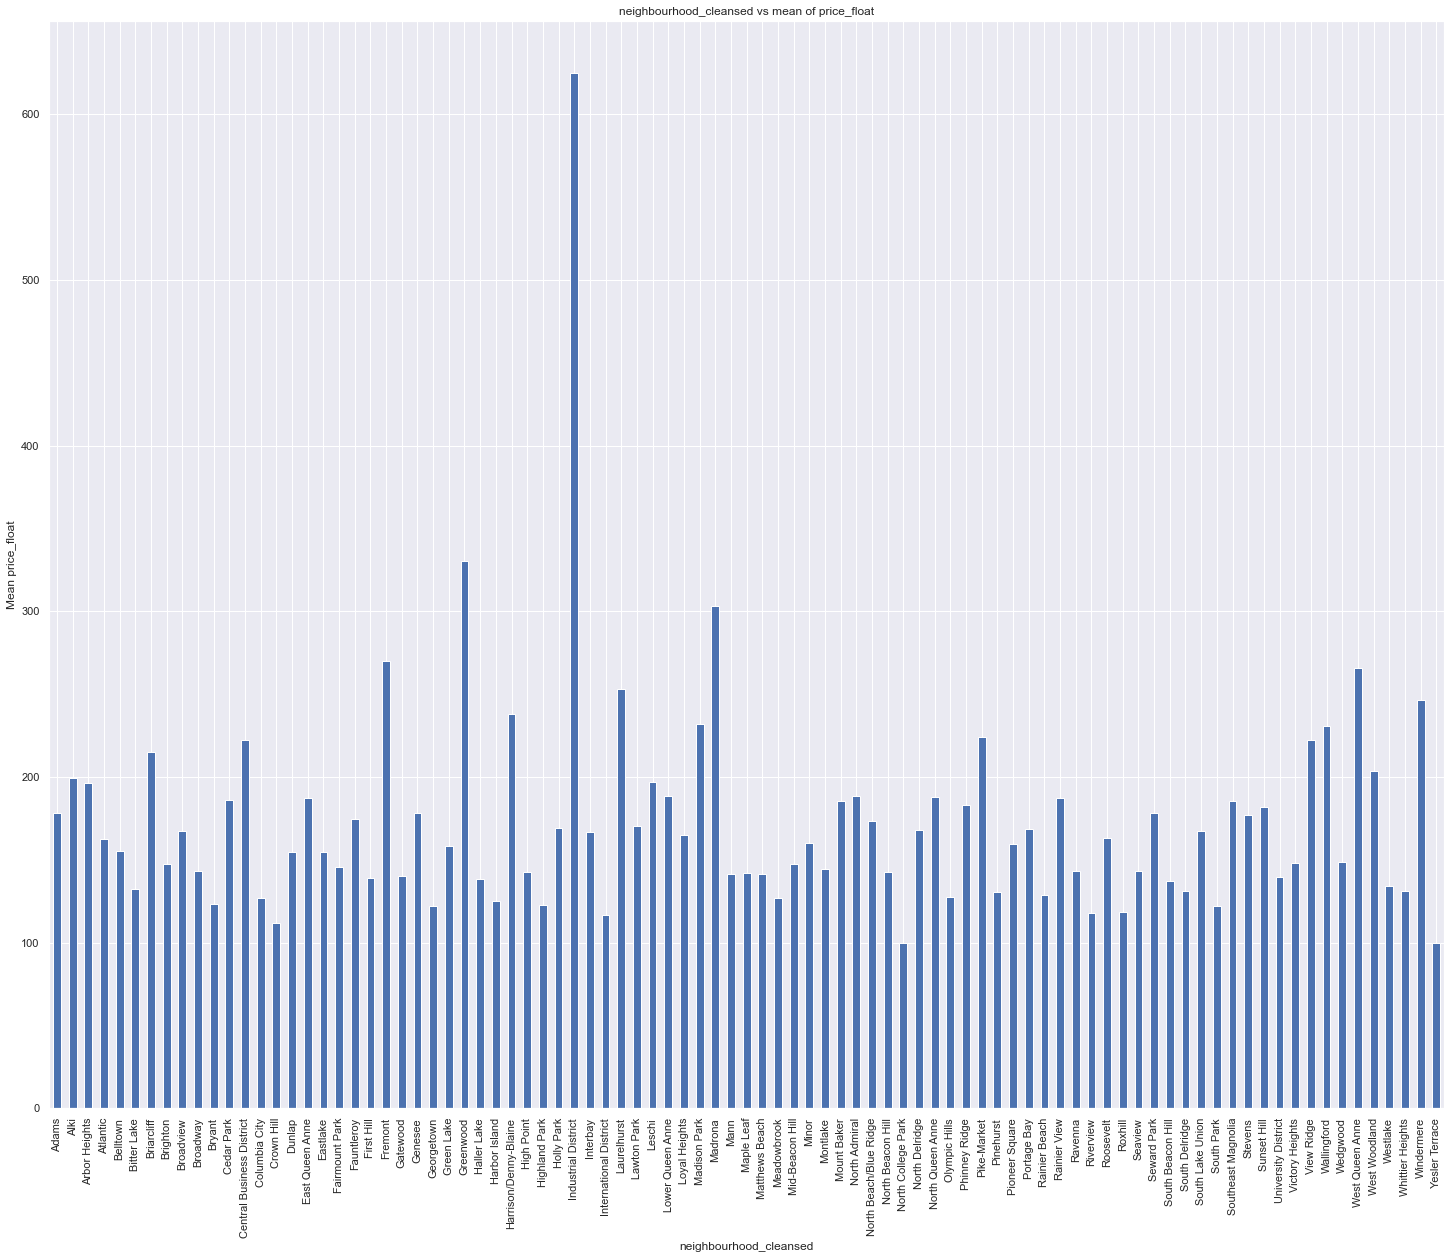

In [159]:
grouped_means_graph(list_df, 'neighbourhood_cleansed', 'price_float',(25,20))

There are only a few listings in the industrial district, and at least one of them must be quite expensive!Some other pricy neighborhoods include Fremont, Greenwood, and Phinney Ridge. 

AirBNB also has info about larger neighborhood groups. 

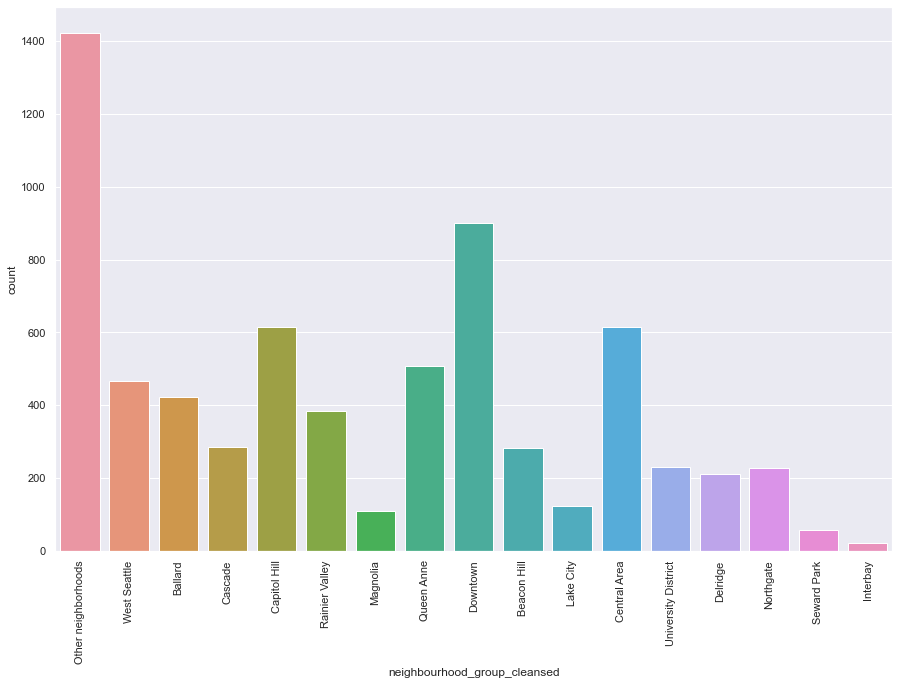

In [66]:
sns.countplot(data=list_df, x='neighbourhood_group_cleansed')
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation = 90);

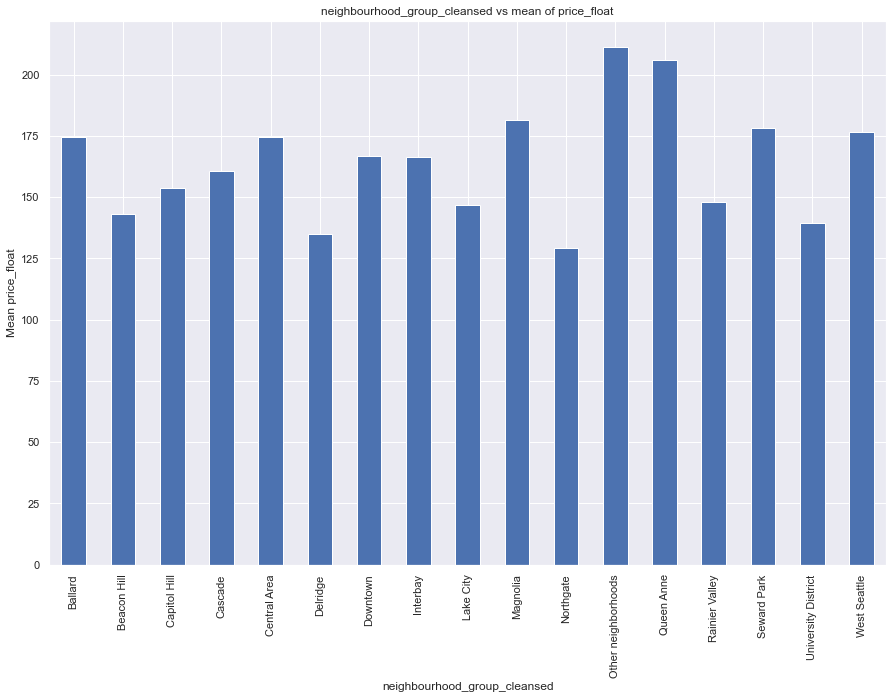

In [129]:
grouped_means_graph(list_df, 'neighbourhood_group_cleansed', 'price_float',(15,10))

The catch-all other neighborhoods category is the highest, which makes sense since many of the highest price neighborhoods from above will end up in this category. Queen Anne has the highest average price per night. 

Let's look at some attributes of the AirBNBs. 

In [160]:
list_df['beds'].value_counts(dropna=False)

1.0     2902
2.0     1874
3.0     1077
4.0      495
5.0      216
6.0      122
7.0       64
NaN       56
8.0       36
9.0       20
10.0      11
12.0       3
14.0       2
15.0       2
16.0       1
11.0       1
Name: beds, dtype: int64

In [161]:
list_df['accommodates'].value_counts(dropna=False)

2     2457
4     1607
6      818
3      531
5      358
8      325
1      269
7      141
10     132
12      74
16      60
9       46
11      28
14      23
15       7
13       6
Name: accommodates, dtype: int64

In [91]:
list_df['bathrooms_text'].value_counts(dropna=False)

1 bath               3940
2 baths              1029
2.5 baths             367
1 private bath        329
1.5 baths             313
1 shared bath         298
3 baths               229
3.5 baths             136
2 shared baths         68
1.5 shared baths       60
4 baths                34
3 shared baths         23
4.5 baths              10
Half-bath               9
0 baths                 8
0 shared baths          6
6 baths                 5
16 shared baths         4
4 shared baths          2
2.5 shared baths        2
6.5 baths               2
7 baths                 2
5 baths                 2
3.5 shared baths        1
Shared half-bath        1
Private half-bath       1
5.5 baths               1
Name: bathrooms_text, dtype: int64

The number of beds and people accomodated are already in good shape, but bathrooms will take some work. There's two variables here: how many bathrooms, and whether those bathrooms are shared. We'll need number of baths and a binary variable for shared or not. First, let's turn half-bath into .5

In [99]:
list_df['bathrooms_text'] = list_df['bathrooms_text'].str.replace('half-bath', "0.5")
list_df['bathrooms_text'] = list_df['bathrooms_text'].str.replace('Half-bath', "0.5")

In [100]:
list_df['bathrooms_text'].value_counts(dropna=False)

1 bath              3940
2 baths             1029
2.5 baths            367
1 private bath       329
1.5 baths            313
1 shared bath        298
3 baths              229
3.5 baths            136
2 shared baths        68
1.5 shared baths      60
4 baths               34
3 shared baths        23
4.5 baths             10
0.5                    9
0 baths                8
0 shared baths         6
6 baths                5
16 shared baths        4
4 shared baths         2
2.5 shared baths       2
6.5 baths              2
7 baths                2
5 baths                2
3.5 shared baths       1
Shared 0.5             1
Private 0.5            1
5.5 baths              1
Name: bathrooms_text, dtype: int64

Now, let's extract the number of bathrooms. 

In [113]:
list_df['no_of_bathrooms'] = list_df['bathrooms_text'].str.extract('(\d+.?\d*)').astype(float)

In [114]:
list_df['no_of_bathrooms'].value_counts(dropna=False)

1.0     4567
2.0     1097
1.5      373
2.5      369
3.0      252
3.5      137
4.0       36
0.0       14
0.5       11
4.5       10
6.0        5
16.0       4
6.5        2
7.0        2
5.0        2
5.5        1
Name: no_of_bathrooms, dtype: int64

Next, let's pick out the shared bathrooms. 

In [110]:
list_df['shared'] = list_df['bathrooms_text'].str.contains('shared').astype(int)

In [111]:
list_df['shared'].value_counts(dropna=False)

0    6418
1     464
Name: shared, dtype: int64

In [118]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,no_of_bathrooms,shared
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,str-opli-19-002622,f,2,2,0,0,0.91,99.0,1.0,0
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,STR-OPLI-19-003039,f,9,0,9,0,1.19,67.0,3.0,1
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,STR-OPLI-19-002182,f,2,2,0,0,0.59,184.0,1.0,0
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,STR-OPLI-19-002182,f,2,2,0,0,0.52,155.0,1.0,0
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,STR -OPLI-19-002622,f,2,2,0,0,0.63,NaN,1.0,0


In [162]:
list_df['property_type'].value_counts(dropna=False)

Entire home                           1842
Entire rental unit                    1701
Private room in home                   689
Entire guest suite                     585
Entire condo                           559
Entire townhouse                       525
Entire guesthouse                      269
Private room in townhouse              108
Entire serviced apartment               88
Room in boutique hotel                  73
Private room in rental unit             71
Entire loft                             50
Entire cottage                          48
Room in hotel                           39
Private room in guest suite             30
Entire bungalow                         29
Tiny home                               22
Private room in bed and breakfast       21
Entire vacation home                    18
Private room in bungalow                11
Private room in condo                   11
Private room in villa                    8
Entire villa                             6
Entire cabi

In [163]:
list_df['room_type'].value_counts(dropna=False)

Entire home/apt    5780
Private room       1083
Shared room          19
Name: room_type, dtype: int64

Time to return to the missing prices. What can we learn about the properties with missing prices? 

In [119]:
df[df["price_float"].isnull()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.91,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.63,NaN
9,116221,https://www.airbnb.com/rooms/116221,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.74 · 1 bedroom · 1...,NaN,The apartment is conveniently located in the h...,https://a0.muscache.com/pictures/17918750/5304...,587302,...,4.91,4.52,NaN,f,1,1,0,0,0.32,NaN
63,681866,https://www.airbnb.com/rooms/681866,20231220185704,2023-12-21,previous scrape,Home in Seattle · ★4.98 · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/9949681/74e4c...,103825,...,4.63,4.95,NaN,f,1,0,1,0,0.31,NaN
72,752483,https://www.airbnb.com/rooms/752483,20231220185704,2023-12-21,previous scrape,Townhouse in Seattle · ★4.84 · 2 bedrooms · 2 ...,NaN,Capitol Hill is the most lively neighborhood i...,https://a0.muscache.com/pictures/10411745/888f...,450548,...,4.95,4.72,STR-OPLI-19-000434,f,1,1,0,0,1.52,NaN
74,789229,https://www.airbnb.com/rooms/789229,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.75 · 1 bedroom · 1...,NaN,NaN,https://a0.muscache.com/pictures/39865057/7c00...,1872473,...,4.73,4.71,NaN,f,1,1,0,0,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6566,1012273978357374108,https://www.airbnb.com/rooms/1012273978357374108,20231220185704,2023-12-20,city scrape,Home in Seattle · ★New · 1 bedroom · 1 bed · 1...,NaN,Wedgwood is a quiet residential neighborhood k...,https://a0.muscache.com/pictures/miso/Hosting-...,61462577,...,NaN,NaN,NaN,f,1,0,1,0,NaN,NaN
6568,1012403644076732882,https://www.airbnb.com/rooms/1012403644076732882,20231220185704,2023-12-21,city scrape,Home in Seattle · ★New · 2 bedrooms · 2 beds ·...,NaN,We are in one of the most vibrant and diverse ...,https://a0.muscache.com/pictures/miso/Hosting-...,82113427,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
6786,1035703340290478360,https://www.airbnb.com/rooms/1035703340290478360,20231220185704,2023-12-21,city scrape,Rental unit in Seattle · ★New · 3 bedrooms · 3...,NaN,The unit is on a quiet residential neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,565526,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
6816,1042867741784045446,https://www.airbnb.com/rooms/1042867741784045446,20231220185704,2023-12-21,city scrape,Home in Seattle · ★New · 2 bedrooms · 2 baths,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,193757240,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN


There's also another source of price data, in the calendar dataframe. Let's see if this listing has price info there. 

In [126]:
cal_df[cal_df["listing_id"] == 1042867741784045446]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2488254,1042867741784045446,2023-12-21,f,$125.00,NaN,30.0,90.0
2488255,1042867741784045446,2023-12-22,t,$125.00,NaN,30.0,90.0
2488256,1042867741784045446,2023-12-23,t,$125.00,NaN,30.0,90.0
2488257,1042867741784045446,2023-12-24,t,$125.00,NaN,30.0,90.0
2488258,1042867741784045446,2023-12-25,t,$125.00,NaN,30.0,90.0
...,...,...,...,...,...,...,...
2488614,1042867741784045446,2024-12-15,f,$125.00,NaN,30.0,90.0
2488615,1042867741784045446,2024-12-16,f,$125.00,NaN,30.0,90.0
2488616,1042867741784045446,2024-12-17,f,$125.00,NaN,30.0,90.0
2488617,1042867741784045446,2024-12-18,f,$125.00,NaN,30.0,90.0


Aha! The calendar dataframe may have the info we need for price. 

In [134]:
cal_df['price'].value_counts(dropna=False)

$150.00      70458
$100.00      67868
$125.00      60241
$250.00      54758
$200.00      47457
             ...  
$36.00         365
$316.00        365
$795.00        365
$1,051.00      365
$616.00        365
Name: price, Length: 526, dtype: int64

In [135]:
cal_df['price'].isnull().sum()

0

Perfect. There are no properties with missing prices. Let's turn them into numbers and figure out how to combine them with the listing dataframe. 

In [144]:
cal_df['price_float'] = cal_df['price'].str.split("$").str[1]
cal_df['price_float'] = cal_df['price_float'].str.replace(",","")
cal_df['price_float'] = cal_df['price_float'].astype('float64')

Great. There's a line in the calendar dataframe for every night in the next year; we don't need to bring each of those lines into this new database. We can create a new dataframe that groups each listing by the mean that will have the same number of rows as our listing dataframe. 

In [145]:
df3 = cal_df.groupby('listing_id').mean().reset_index()

In [146]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      6882 non-null   int64  
 1   adjusted_price  0 non-null      float64
 2   minimum_nights  6882 non-null   float64
 3   maximum_nights  6882 non-null   float64
 4   price_float     6882 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 269.0 KB


Perfect. Now we can merge this mean price dataframe into the listing data frame. 

In [ ]:
merged_df = list_df.merge(df3, left_on='id', right_on='listing_id')

In [151]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6882 entries, 0 to 6881
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [153]:
merged_df['price_float_y'].value_counts(dropna=False)

150.0    193
100.0    186
125.0    165
250.0    150
200.0    130
        ... 
331.0      1
364.0      1
530.0      1
316.0      1
616.0      1
Name: price_float_y, Length: 527, dtype: int64

In [154]:
merged_df['price_float_y'].isnull().sum()

0

Excellent. Every listing has a price pulled from the listing dataframe. 

Now that we've been able to impute the missing price information, let's look at properties that have no reivews. 